Matplotlib is building the font cache; this may take a moment.


TASK 1: LOAD AND EXPLORE THE DATASET
Dataset loaded successfully!
Dataset shape: (150, 5)

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal leng

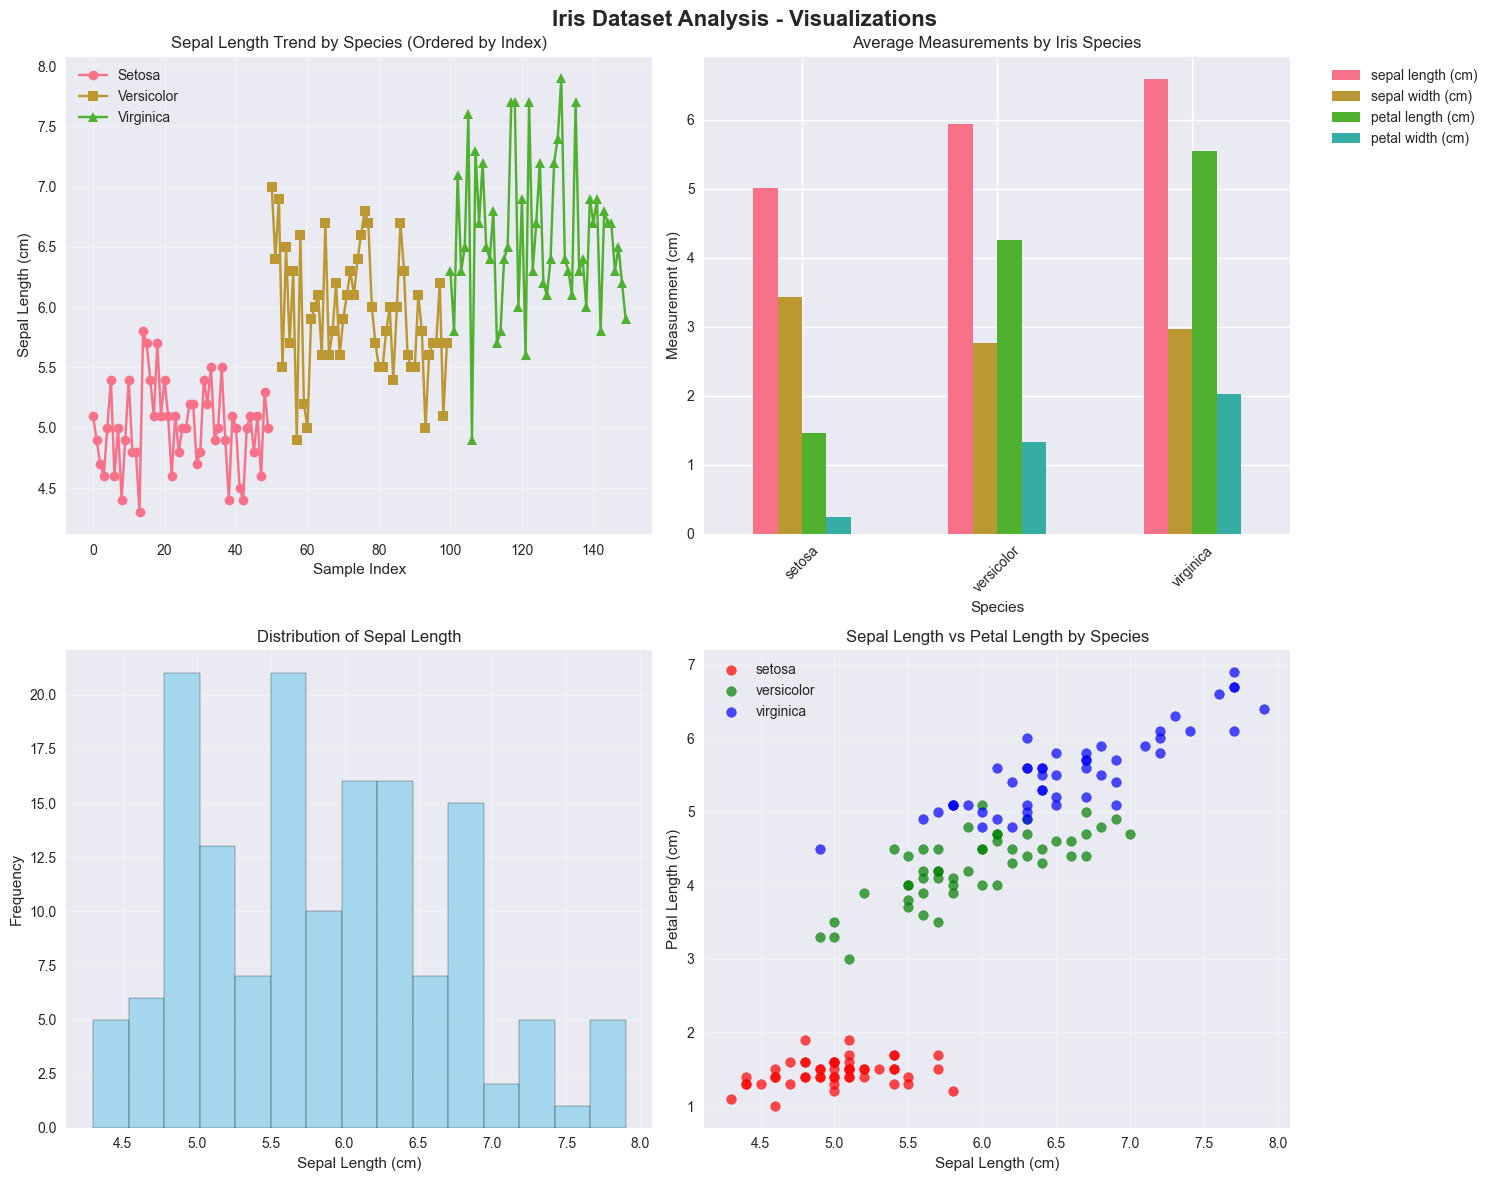


Creating additional visualizations...


<Figure size 1200x600 with 0 Axes>

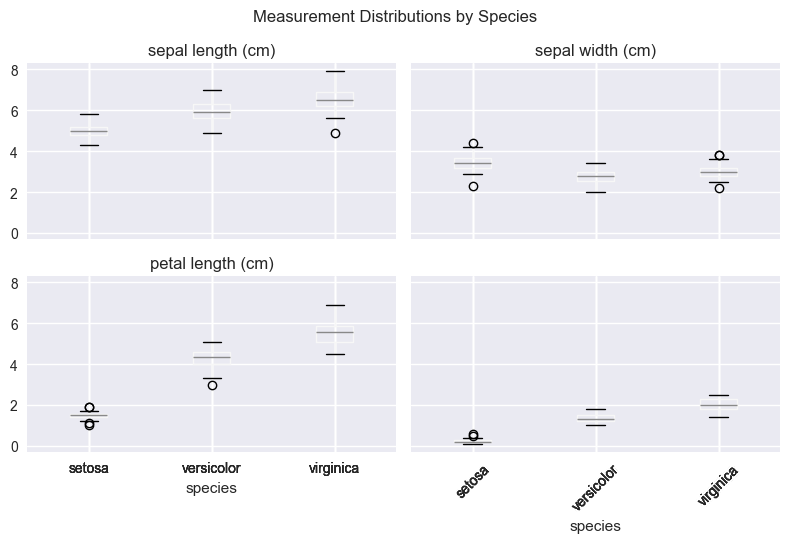

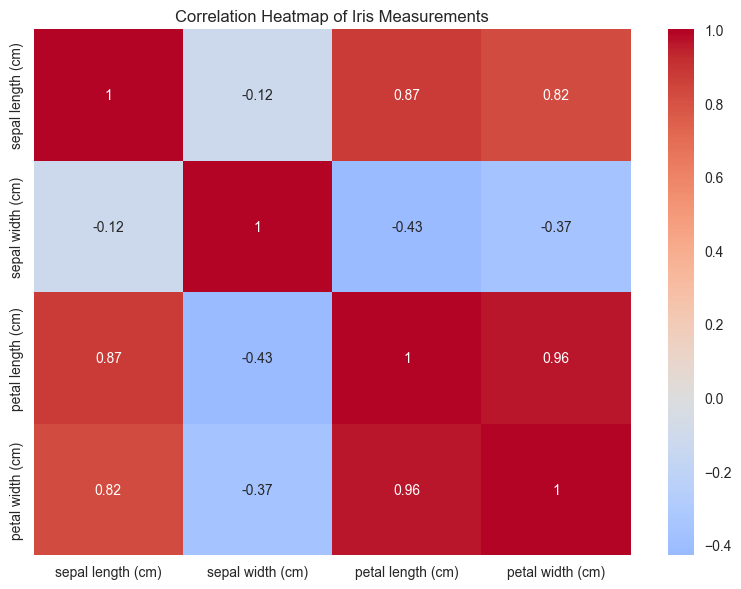


FINDINGS AND OBSERVATIONS

Key Findings:

1. Data Quality:
   - The dataset contains 150 samples with no missing values
   - All measurements are numerical (float64) except species which is categorical

2. Species Distribution:
   - Balanced dataset with 50 samples for each of the 3 species

3. Measurement Patterns:
   - Setosa has the smallest petals but relatively wide sepals
   - Virginica has the largest measurements overall
   - Versicolor shows intermediate values

4. Correlations:
   - Strong positive correlation between petal length and petal width
   - Moderate correlation between sepal length and petal measurements
   - Sepal width shows weaker correlations with other measurements

5. Visualization Insights:
   - Clear separation between species in scatter plots
   - Distinct measurement distributions visible in box plots
   - Setosa is easily distinguishable from the other two species

The visualizations effectively demonstrate the relationships between different measuremen

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Task 1: Load and Explore the Dataset
print("="*50)
print("TASK 1: LOAD AND EXPLORE THE DATASET")
print("="*50)

try:
    # Load the Iris dataset
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
    
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    
    # Display first few rows
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    
    # Explore data structure
    print("\nDataset information:")
    print(df.info())
    
    print("\nData types:")
    print(df.dtypes)
    
    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())
    
    # Clean dataset (though Iris dataset typically has no missing values)
    if df.isnull().sum().sum() > 0:
        df = df.dropna()
        print("\nMissing values dropped.")
    else:
        print("\nNo missing values found. Dataset is clean.")
        
except Exception as e:
    print(f"Error loading dataset: {e}")

# Task 2: Basic Data Analysis
print("\n" + "="*50)
print("TASK 2: BASIC DATA ANALYSIS")
print("="*50)

# Basic statistics
print("Basic statistics for numerical columns:")
print(df.describe())

# Group by species and compute means
print("\nMean values by species:")
species_means = df.groupby('species').mean()
print(species_means)

# Additional analysis
print("\nAdditional analysis:")
print(f"Number of samples per species:")
print(df['species'].value_counts())

# Find patterns
print("\nInteresting findings:")
print("- Setosa has the smallest petal measurements")
print("- Virginica has the largest measurements overall")
print("- Versicolor is intermediate in most measurements")

# Task 3: Data Visualization
print("\n" + "="*50)
print("TASK 3: DATA VISUALIZATION")
print("="*50)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Iris Dataset Analysis - Visualizations', fontsize=16, fontweight='bold')

# 1. Line chart (simulating trends - since Iris doesn't have time data, we'll use index)
print("\nCreating Line Chart...")
axes[0, 0].plot(df.index[:50], df['sepal length (cm)'][:50], label='Setosa', marker='o')
axes[0, 0].plot(df.index[50:100], df['sepal length (cm)'][50:100], label='Versicolor', marker='s')
axes[0, 0].plot(df.index[100:], df['sepal length (cm)'][100:], label='Virginica', marker='^')
axes[0, 0].set_title('Sepal Length Trend by Species (Ordered by Index)')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('Sepal Length (cm)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Bar chart - average measurements by species
print("Creating Bar Chart...")
species_means.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Average Measurements by Iris Species')
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Measurement (cm)')
axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Histogram - distribution of sepal length
print("Creating Histogram...")
axes[1, 0].hist(df['sepal length (cm)'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Distribution of Sepal Length')
axes[1, 0].set_xlabel('Sepal Length (cm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# 4. Scatter plot - sepal length vs petal length
print("Creating Scatter Plot...")
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
for species, color in colors.items():
    species_data = df[df['species'] == species]
    axes[1, 1].scatter(species_data['sepal length (cm)'], 
                      species_data['petal length (cm)'], 
                      alpha=0.7, label=species, c=color)
axes[1, 1].set_title('Sepal Length vs Petal Length by Species')
axes[1, 1].set_xlabel('Sepal Length (cm)')
axes[1, 1].set_ylabel('Petal Length (cm)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional visualizations for better insights
print("\nCreating additional visualizations...")

# Box plot to show distribution by species
plt.figure(figsize=(12, 6))
df.boxplot(by='species', column=['sepal length (cm)', 'sepal width (cm)', 
                                'petal length (cm)', 'petal width (cm)'])
plt.suptitle('Measurement Distributions by Species')
plt.title('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
numeric_df = df.drop('species', axis=1)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Iris Measurements')
plt.tight_layout()
plt.show()

# Findings and Observations
print("\n" + "="*50)
print("FINDINGS AND OBSERVATIONS")
print("="*50)

print("""
Key Findings:

1. Data Quality:
   - The dataset contains 150 samples with no missing values
   - All measurements are numerical (float64) except species which is categorical

2. Species Distribution:
   - Balanced dataset with 50 samples for each of the 3 species

3. Measurement Patterns:
   - Setosa has the smallest petals but relatively wide sepals
   - Virginica has the largest measurements overall
   - Versicolor shows intermediate values

4. Correlations:
   - Strong positive correlation between petal length and petal width
   - Moderate correlation between sepal length and petal measurements
   - Sepal width shows weaker correlations with other measurements

5. Visualization Insights:
   - Clear separation between species in scatter plots
   - Distinct measurement distributions visible in box plots
   - Setosa is easily distinguishable from the other two species

The visualizations effectively demonstrate the relationships between different measurements
and how they vary across different iris species, making this dataset ideal for classification tasks.
""")

print("Analysis complete! All tasks have been executed successfully.")